# Case Study on Repaying the Credit

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import warnings
warnings.filterwarnings('ignore')

In [2]:

data = pd.read_csv('DS1_C5_S4_Credit_Data_Hackathon.csv')

df = pd.DataFrame(data)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [3]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

#### **To remove negative values in the Days Employed Column

In [4]:

df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].astype('str')

df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].str.replace(r"-",'', regex=True)

df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].astype('float')

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637.0,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188.0,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225.0,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039.0,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038.0,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [5]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:               
        if df[column].nunique() < 20:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)        

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

### User-defined function for level 1 analysis of categorical columns
This function will check for the following: \
Unique values \
Mode \
Total count of missing values
Graphs to better understand the data

In [6]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}") 
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}")
      

## 1. Analysis of Target Column

In [7]:
info_of_cat("TARGET")

Unique values in TARGET are: [1 0]
Mode of TARGET is 0
Number of missing values in TARGET is 0


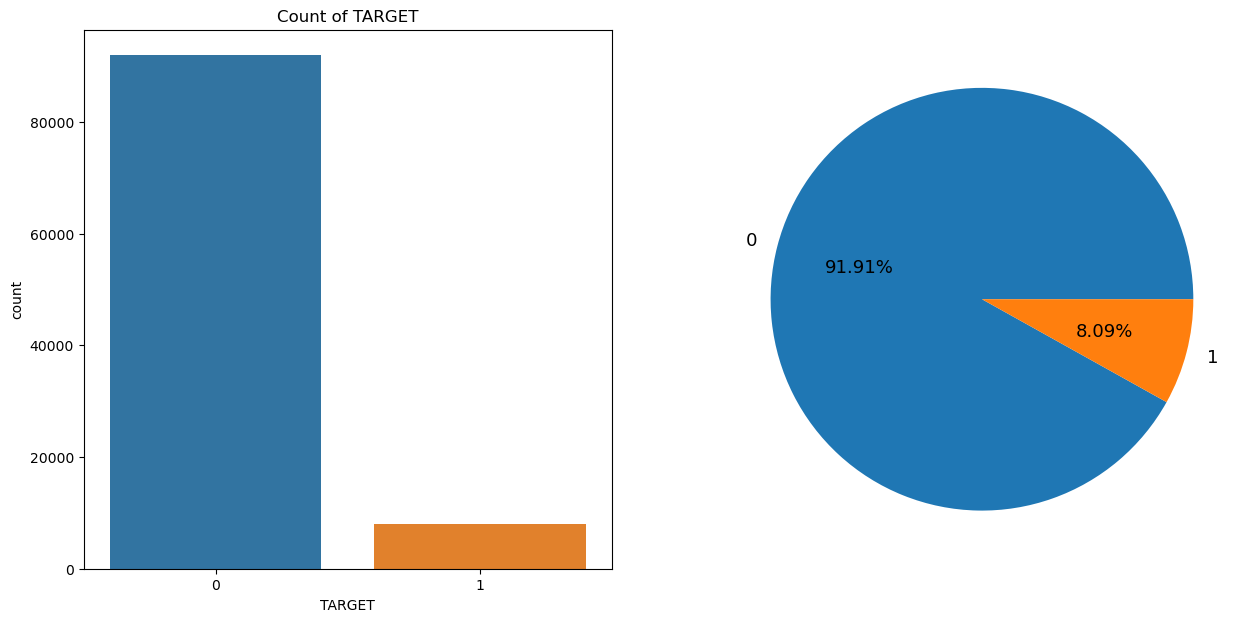

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of TARGET")                  
percentage = df["TARGET"].value_counts()         
labels = list(df["TARGET"].value_counts().index) 

sns.countplot(x = df["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### '1' Indicates Difficulties for payment. The number of defaulting customers are less contributing to 8.09% as compared to 91.91% of other customers who are regular on payments.

## 2. Analysis of Name of Contract Type Column

In [9]:
info_of_cat("NAME_CONTRACT_TYPE")

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is Cash loans
Number of missing values in NAME_CONTRACT_TYPE is 0


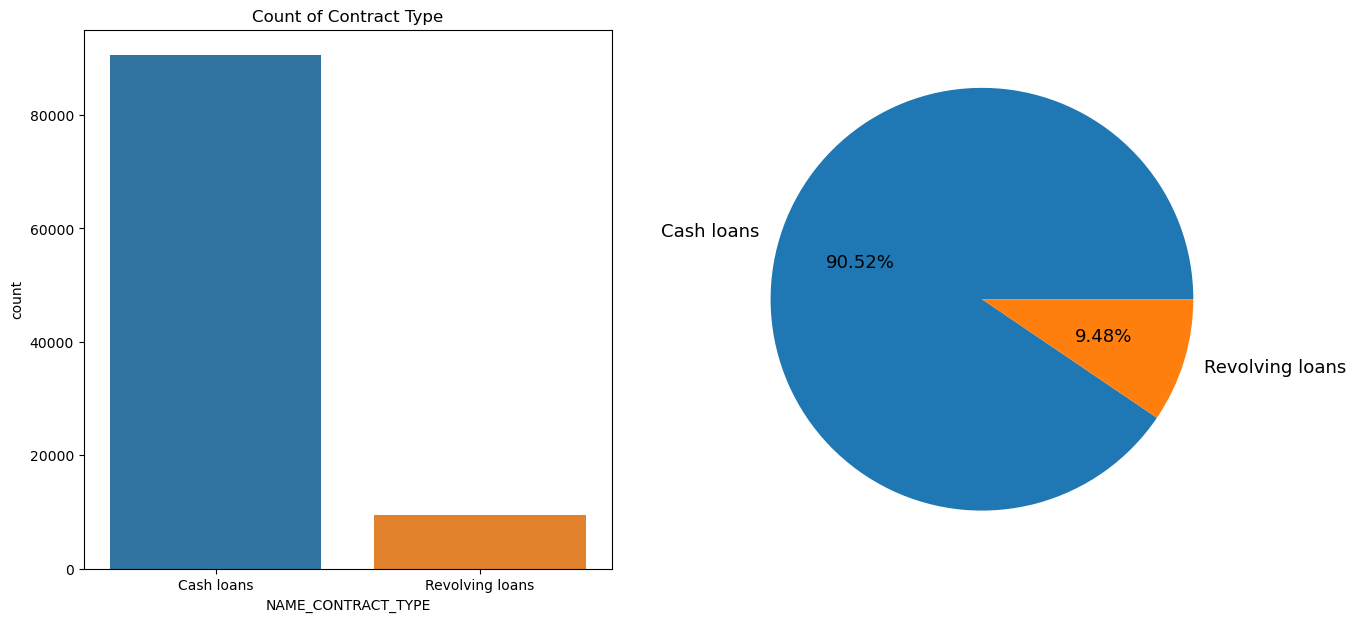

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Contract Type")                  
percentage = df["NAME_CONTRACT_TYPE"].value_counts()         
labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index) 

sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Most of the customers have taken Cash Loans compared to Revolving Loans which is good for the Bank. Cash Loans are less worry than Revolving Loans to Banks.

###### Revolving Loans have a disadvanctage of letting the customers choose their own billing schedule, which could add up in Interest if the customer delay the payments. And, a Loss for the Bank.

## 3. Analysis of Gender Column

In [11]:
info_of_cat("GENDER")

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is F
Number of missing values in GENDER is 0


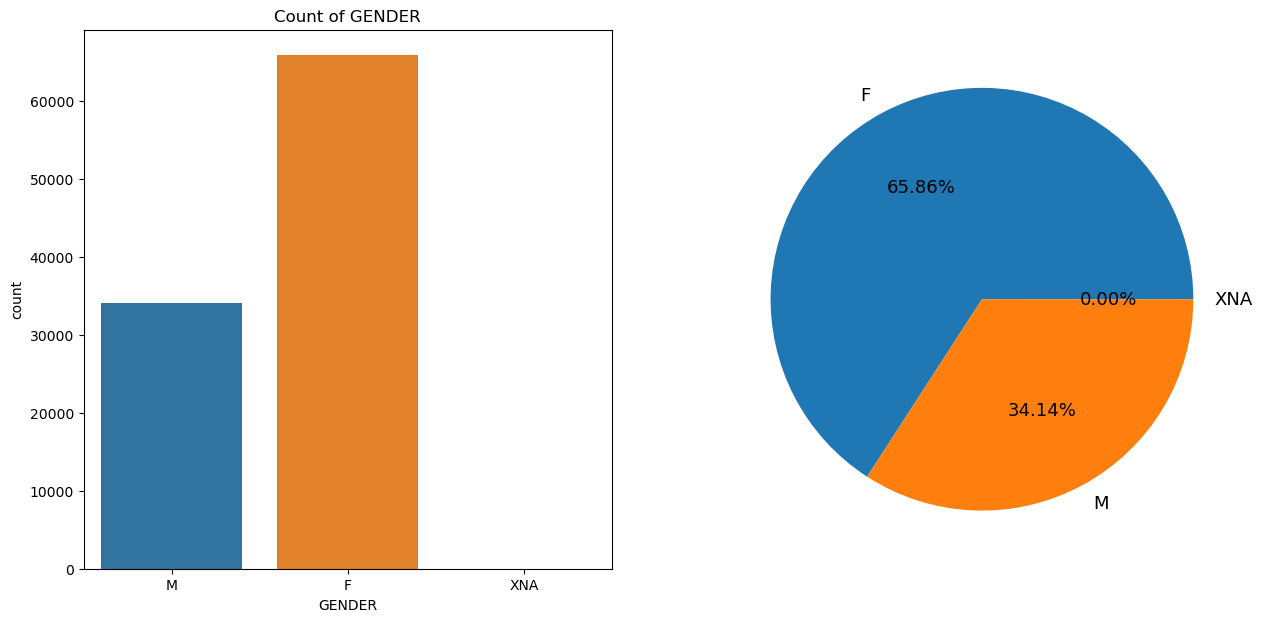

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of GENDER")                  
percentage = df["GENDER"].value_counts()         
labels = list(df["GENDER"].value_counts().index) 

sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Dataset indicates that Female Customers have taken more number of loans than Male Customers contributing to 65.86% as against 34.14%

## 4. Analysis of Cars Owned Column

In [13]:
info_of_cat("Car")

Unique values in Car are: ['N' 'Y']
Mode of Car is N
Number of missing values in Car is 0


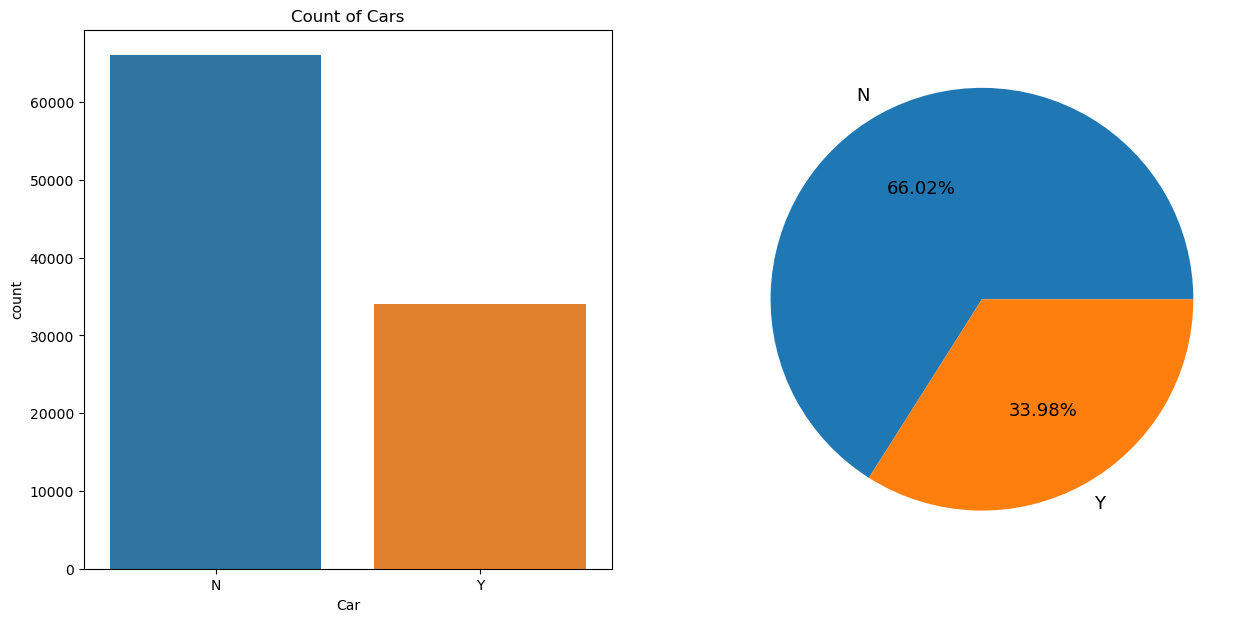

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Cars")                  
percentage = df["Car"].value_counts()         
labels = list(df["Car"].value_counts().index) 

sns.countplot(x = df["Car"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### More than 50% of the customers who have taken loan do not own cars. Only 33.98% of them own cars.

## 5. Analysis of House  Column

In [15]:
info_of_cat("House")

Unique values in House are: ['Y' 'N']
Mode of House is Y
Number of missing values in House is 0


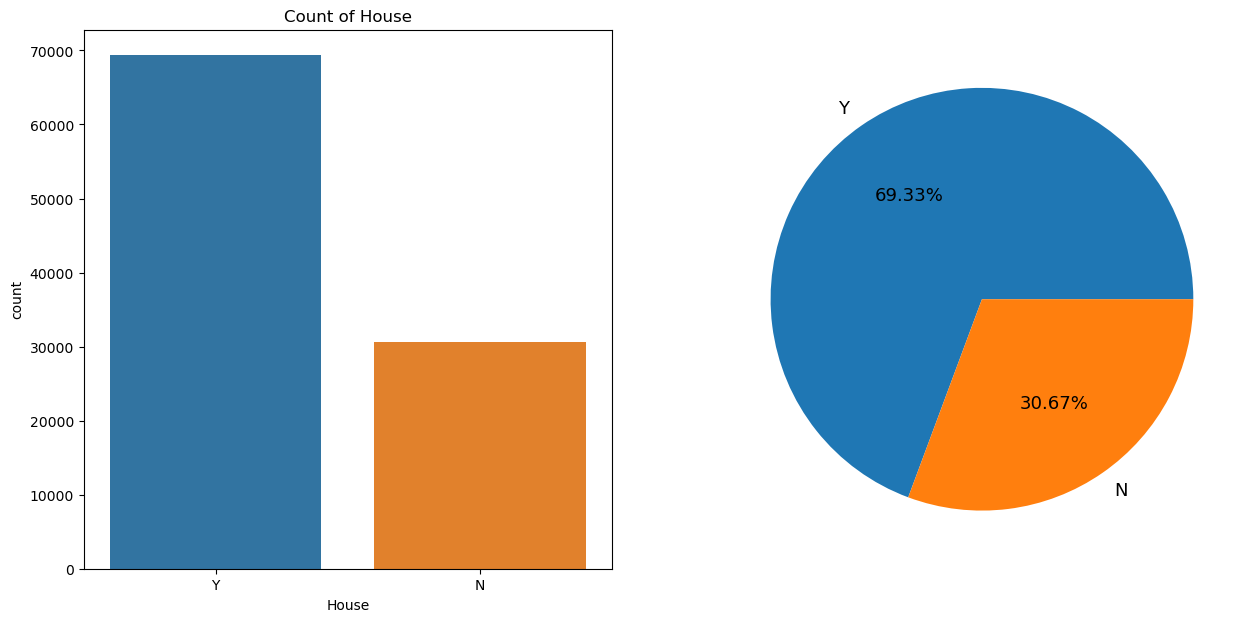

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of House")                  
percentage = df["House"].value_counts()         
labels = list(df["House"].value_counts().index) 

sns.countplot(x = df["House"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### 69.33% of the customers who have taken loan own a House as compared to 30.67% of them who do not own a house.

## 6. Analysis of Count of Children Column

In [17]:
info_of_cat("CNT_CHILDREN")

Unique values in CNT_CHILDREN are: [ 0  1  2  3  4  7  5  6  8  9 11 12]
Mode of CNT_CHILDREN is 0
Number of missing values in CNT_CHILDREN is 0


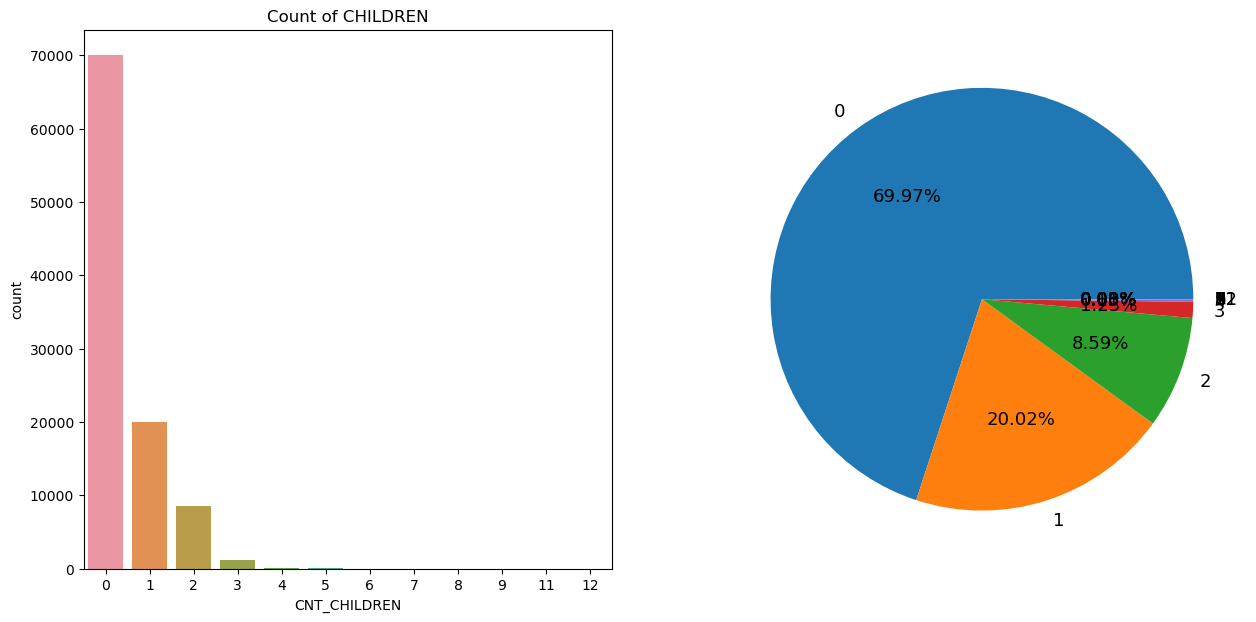

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of CHILDREN")                  
percentage = df["CNT_CHILDREN"].value_counts()         
labels = list(df["CNT_CHILDREN"].value_counts().index) 

sns.countplot(x = df["CNT_CHILDREN"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Dataset suggests that 69.97% of customers do not have Children. Some of the customers have 1-2 child.

## 7. Analysis of Accompany Type Column

In [19]:
info_of_cat("NAME_TYPE_SUITE")

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 405


### Missing Value Treatment with Mode of the Column

In [20]:
NAME_TYPE_SUITE_mode = df.NAME_TYPE_SUITE.mode()[0]
print(NAME_TYPE_SUITE_mode)
df["NAME_TYPE_SUITE"].fillna(NAME_TYPE_SUITE_mode, inplace = True)

Unaccompanied


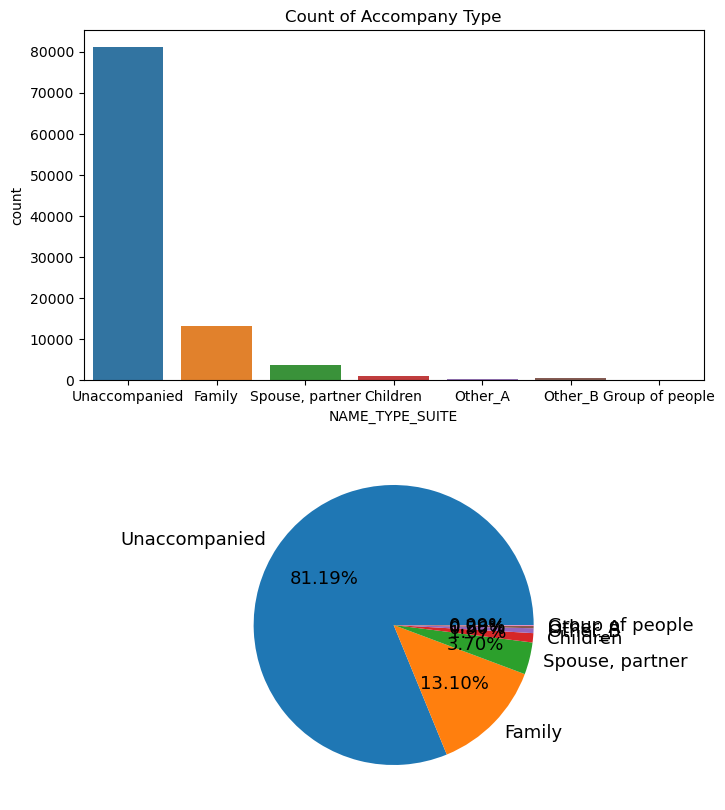

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10)) 
ax[0].set_title("Count of Accompany Type")                  
percentage = df["NAME_TYPE_SUITE"].value_counts()         
labels = list(df["NAME_TYPE_SUITE"].value_counts().index) 

sns.countplot(x = df["NAME_TYPE_SUITE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Most of the customers were not accompanied by anyone during the time of Loan application. Some of them were accompaned by their Family, Spouse.

## 8. Analysis of Income Type Column

In [22]:
info_of_cat("NAME_INCOME_TYPE")

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is Working
Number of missing values in NAME_INCOME_TYPE is 0


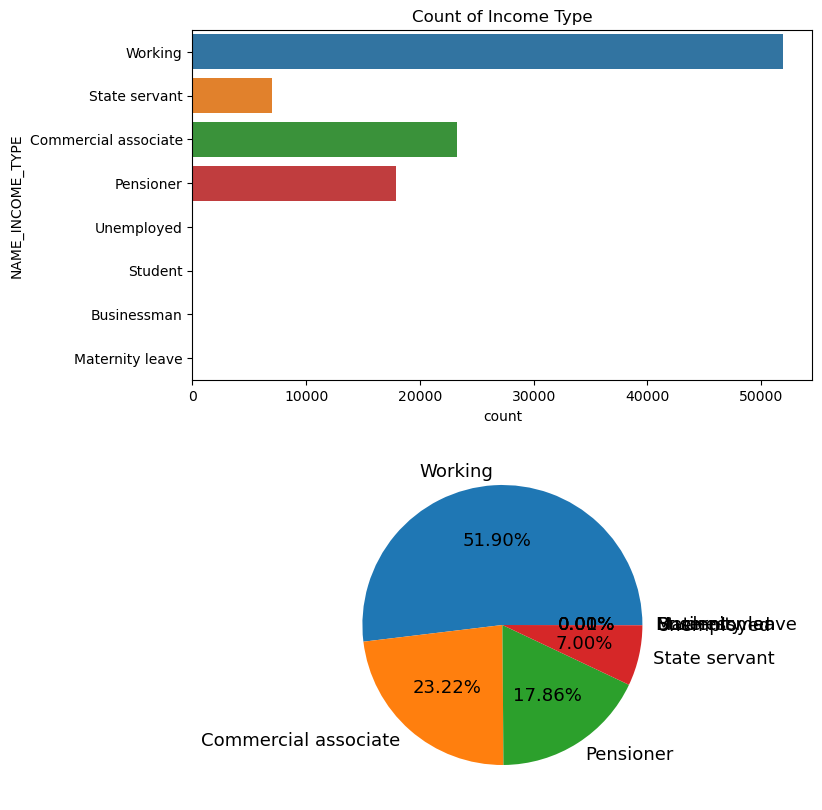

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10)) 
ax[0].set_title("Count of Income Type")                  
percentage = df["NAME_INCOME_TYPE"].value_counts()         
labels = list(df["NAME_INCOME_TYPE"].value_counts().index) 

sns.countplot(y = df["NAME_INCOME_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### The Income type is more in working category contributing to 51.90%. The other groups who have taken loan includes State servants, Commercial associats, Pensioners.

To answer the question, who is more likely to not default on payments, we need higher analysis which follows below under Bivariate and multi variate analysis.

## 9. Analysis of Education Type Column

In [24]:
info_of_cat("NAME_EDUCATION_TYPE")

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE is 0


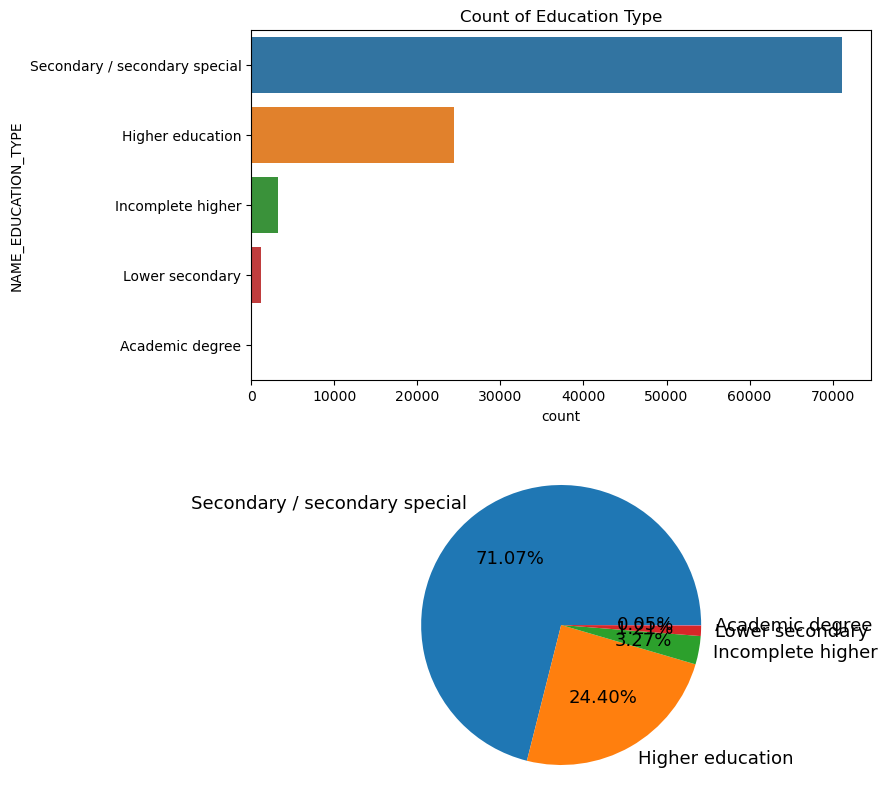

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10)) 
ax[0].set_title("Count of Education Type")                  
percentage = df["NAME_EDUCATION_TYPE"].value_counts()         
labels = list(df["NAME_EDUCATION_TYPE"].value_counts().index) 

sns.countplot(y = df["NAME_EDUCATION_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Customers taking loans are higher from Secondary/Secondary Special Education Background. 

## 10. Analysis of Family Status Column

In [26]:
info_of_cat("NAME_FAMILY_STATUS")

Unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode of NAME_FAMILY_STATUS is Married
Number of missing values in NAME_FAMILY_STATUS is 0


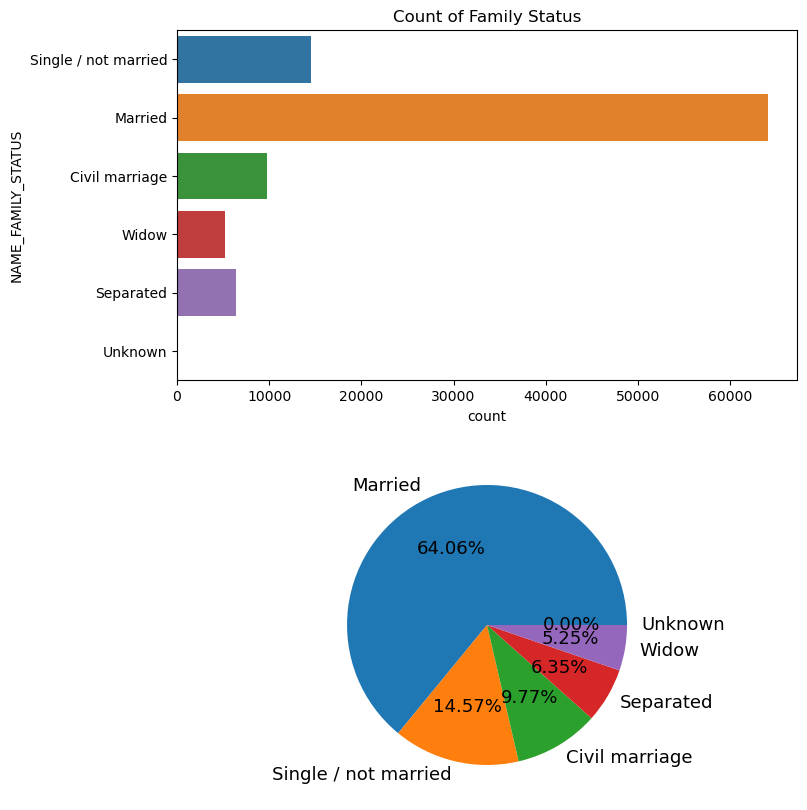

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10)) 
ax[0].set_title("Count of Family Status")                  
percentage = df["NAME_FAMILY_STATUS"].value_counts()         
labels = list(df["NAME_FAMILY_STATUS"].value_counts().index) 

sns.countplot(y = df["NAME_FAMILY_STATUS"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Married customers tend to take more loans compared to other Marital Status. 

## 11. Analysis of Mobile Column

In [28]:
info_of_cat("MOBILE")

Unique values in MOBILE are: [1 0]
Mode of MOBILE is 1
Number of missing values in MOBILE is 0


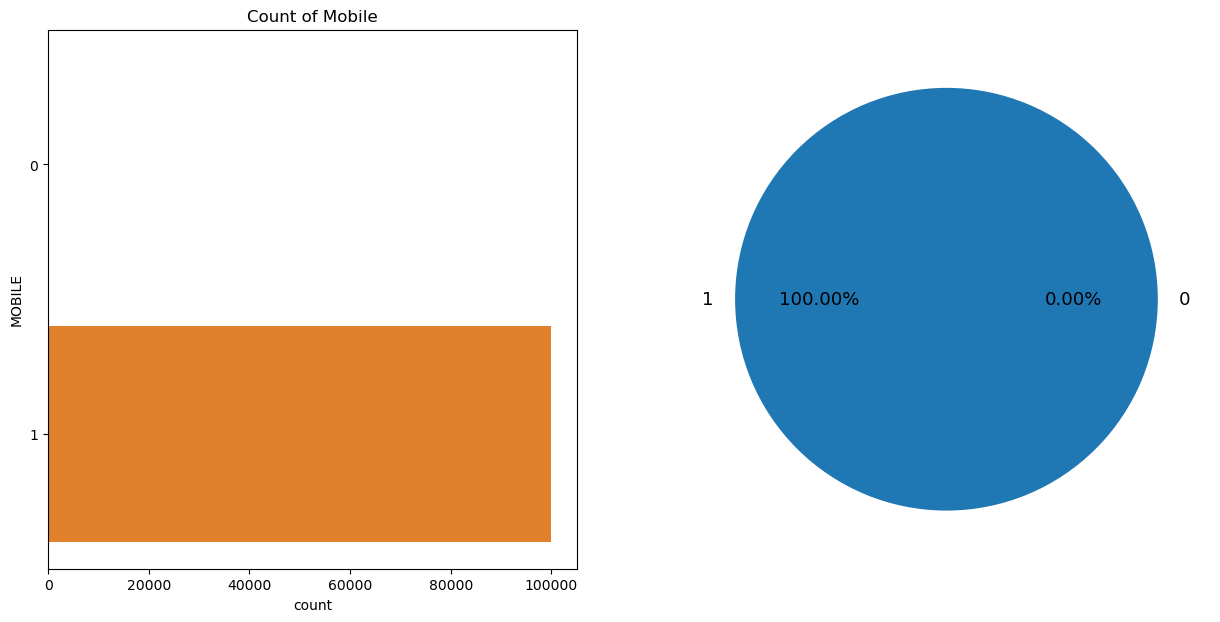

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Mobile")                  
percentage = df["MOBILE"].value_counts()         
labels = list(df["MOBILE"].value_counts().index) 

sns.countplot(y = df["MOBILE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Status '1' indicates that all the customers have provided their Mobile numbers to the Bank.

## 12. Analysis of Work Phone Column

In [30]:
info_of_cat("WORK_PHONE")

Unique values in WORK_PHONE are: [1 0]
Mode of WORK_PHONE is 1
Number of missing values in WORK_PHONE is 0


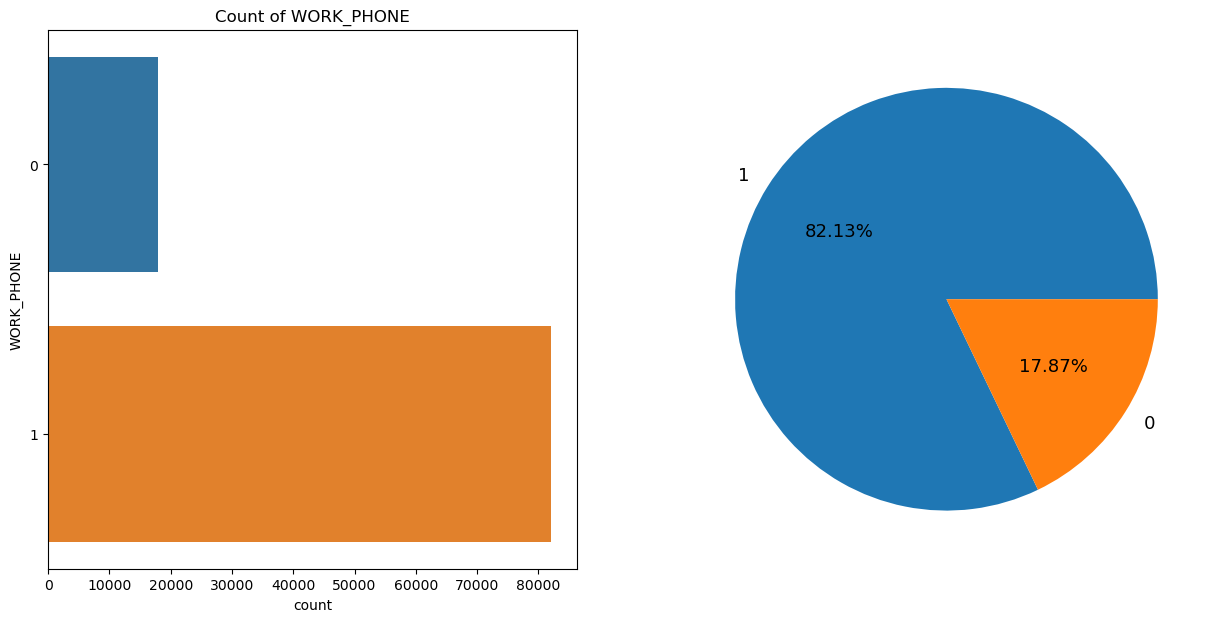

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of WORK_PHONE")                  
percentage = df["WORK_PHONE"].value_counts()         
labels = list(df["WORK_PHONE"].value_counts().index) 

sns.countplot(y = df["WORK_PHONE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Status '1' indicates that most of the customers have provided their Work Phone numbers to the Bank. Only 17.87% of the customers have not give their Work Phone numbers.

## 13. Analysis of Home Phone Column

In [32]:
info_of_cat("HOME_PHONE")

Unique values in HOME_PHONE are: [0 1]
Mode of HOME_PHONE is 0
Number of missing values in HOME_PHONE is 0


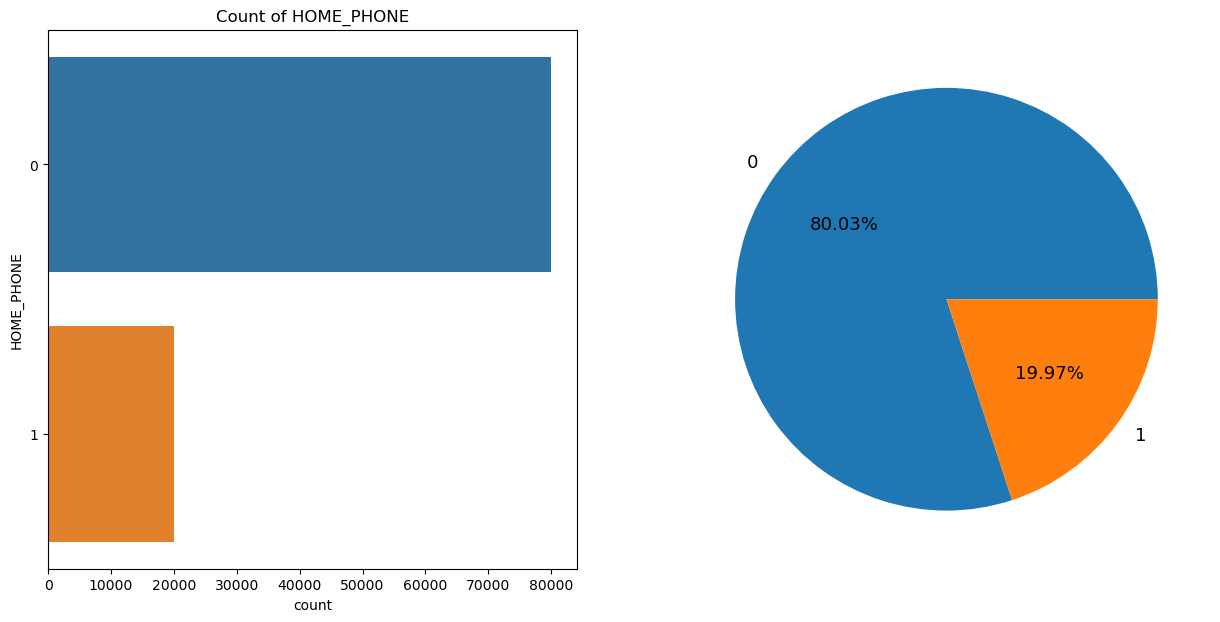

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of HOME_PHONE")                  
percentage = df["HOME_PHONE"].value_counts()         
labels = list(df["HOME_PHONE"].value_counts().index) 

sns.countplot(y = df["HOME_PHONE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Status '1' indicates that most of the customers have provided their Home Phone numbers to the Bank. Only 19.97% of the customers have not give their Home Phone numbers.

## 14. Analysis of Mobile Reachable Column

In [34]:
info_of_cat("MOBILE_REACHABLE")

Unique values in MOBILE_REACHABLE are: [1 0]
Mode of MOBILE_REACHABLE is 1
Number of missing values in MOBILE_REACHABLE is 0


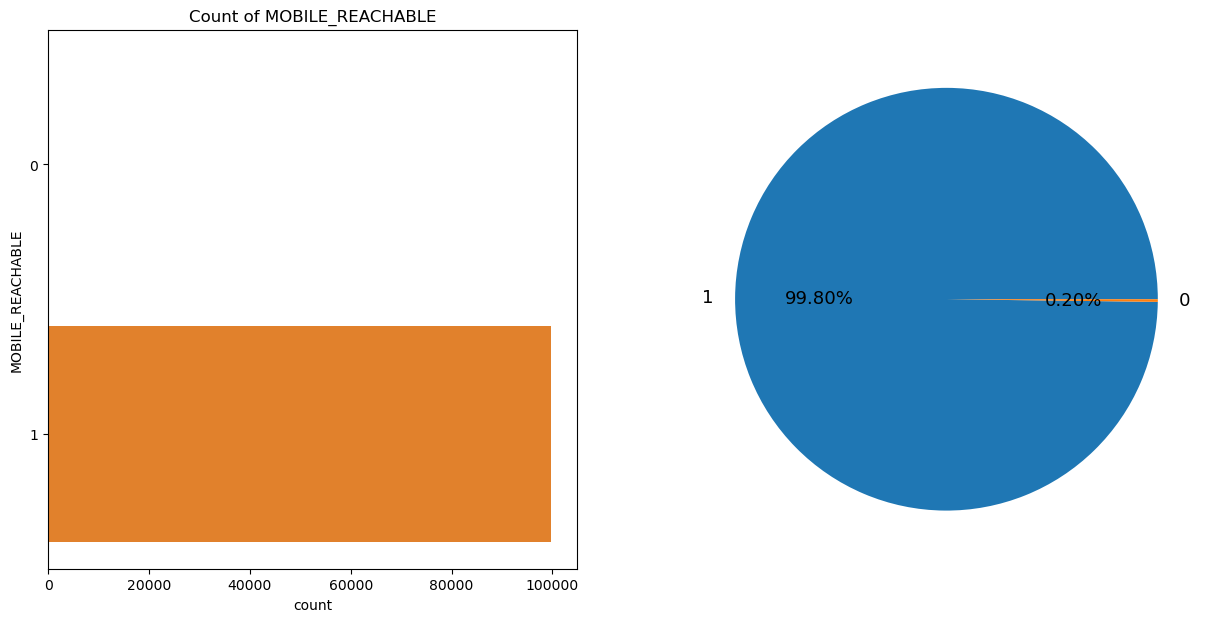

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of MOBILE_REACHABLE")                  
percentage = df["MOBILE_REACHABLE"].value_counts()         
labels = list(df["MOBILE_REACHABLE"].value_counts().index) 

sns.countplot(y = df["MOBILE_REACHABLE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Status '1' indicates that all the customers are reachable at their Phone Numbers.

## 15. Analysis of Flag Email Column

In [36]:
info_of_cat("FLAG_EMAIL")

Unique values in FLAG_EMAIL are: [0 1]
Mode of FLAG_EMAIL is 0
Number of missing values in FLAG_EMAIL is 0


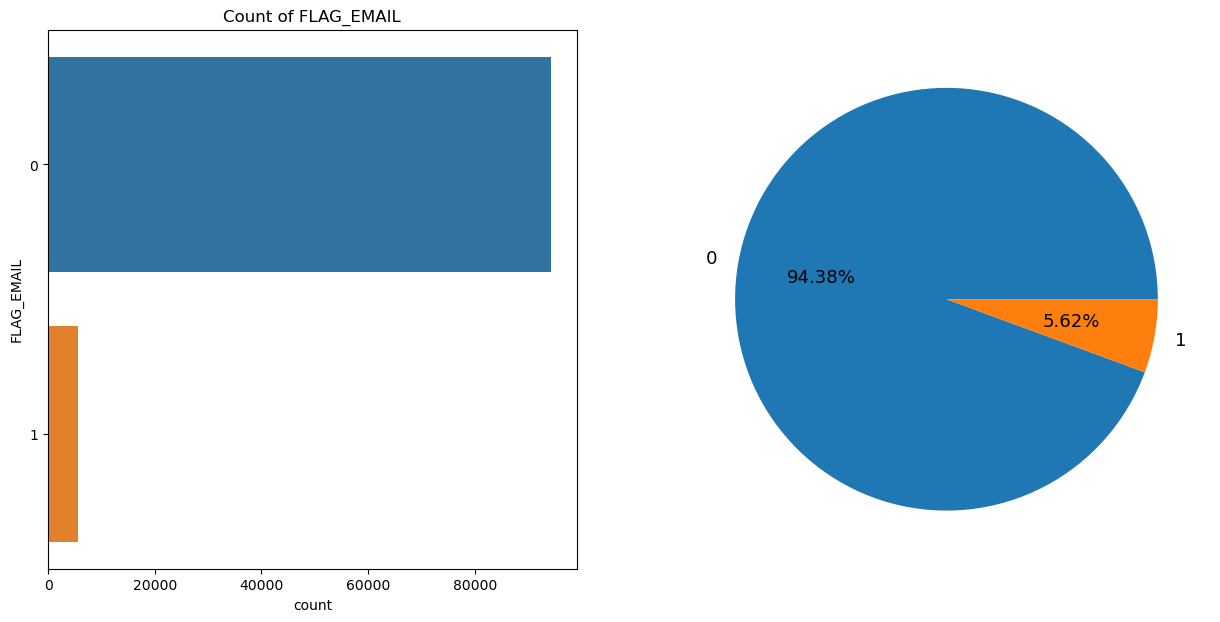

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of FLAG_EMAIL")                  
percentage = df["FLAG_EMAIL"].value_counts()         
labels = list(df["FLAG_EMAIL"].value_counts().index) 

sns.countplot(y = df["FLAG_EMAIL"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Status '1' indicates that only 5.62% of the customers have provided their E-mail Ids.

## 16. Analysis of Occupation Type Column

In [38]:
info_of_cat("OCCUPATION_TYPE")

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 31224


##### Here the missing values are 31224 and it may be because of Human Error. 
##### However, it is not ideal to fill the missing values with mode of the column. Filling missing data with other occupation type will have a mismatch with their corresponding Income Type, Education Type.

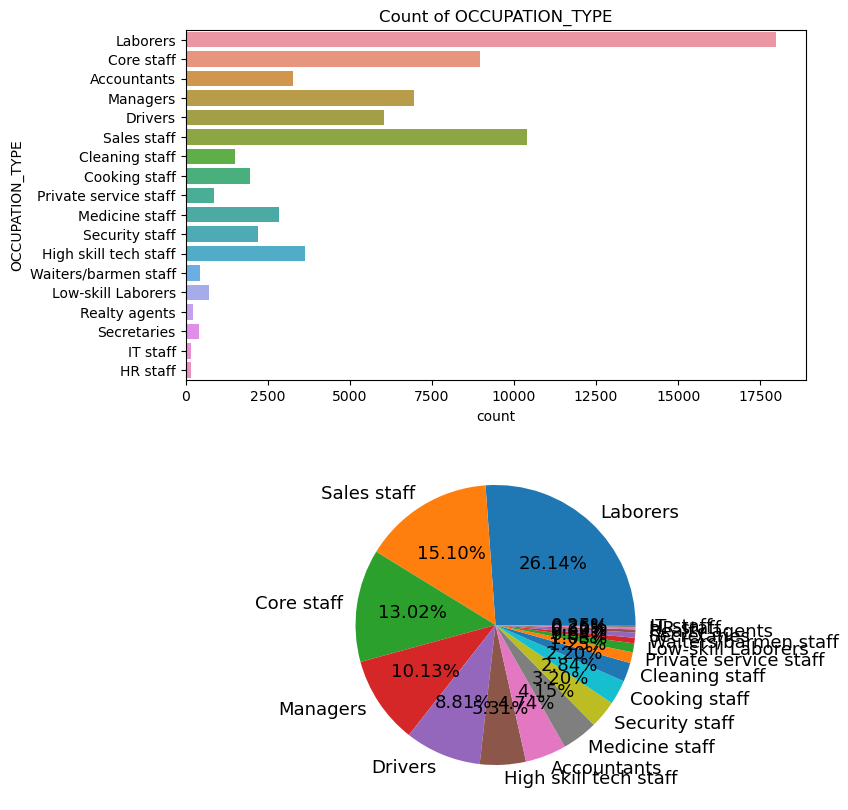

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of OCCUPATION_TYPE")                  
percentage = df["OCCUPATION_TYPE"].value_counts()         
labels = list(df["OCCUPATION_TYPE"].value_counts().index) 

sns.countplot(y = df["OCCUPATION_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### The occupation type thats borrowing more loans are Laborers and Sales Staffs.

## 17. Analysis of Count of Family Members Column

In [40]:
info_of_cat("CNT_FAM_MEMBERS")

Unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
Mode of CNT_FAM_MEMBERS is 2.0
Number of missing values in CNT_FAM_MEMBERS is 1


### Missing Value Treatment with Mode of the Column

In [41]:
CNT_FAM_MEMBERS_mode = df.CNT_FAM_MEMBERS.mode()[0]
print(CNT_FAM_MEMBERS_mode)
df["CNT_FAM_MEMBERS"].fillna(CNT_FAM_MEMBERS_mode, inplace = True)

2.0


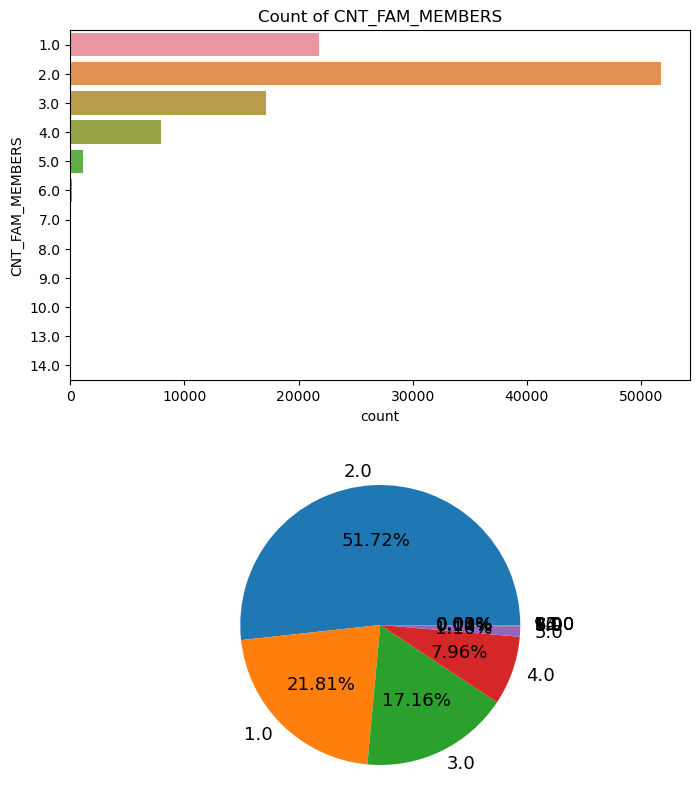

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of CNT_FAM_MEMBERS")                  
percentage = df["CNT_FAM_MEMBERS"].value_counts()         
labels = list(df["CNT_FAM_MEMBERS"].value_counts().index) 

sns.countplot(y = df["CNT_FAM_MEMBERS"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Usually its the family count of 2 who is borrowing more loans from the bank contributing to 51.72%

## 18. Analysis of Application Day Column

In [43]:
info_of_cat("APPLICATION_DAY")

Unique values in APPLICATION_DAY are: ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
Mode of APPLICATION_DAY is TUESDAY
Number of missing values in APPLICATION_DAY is 0


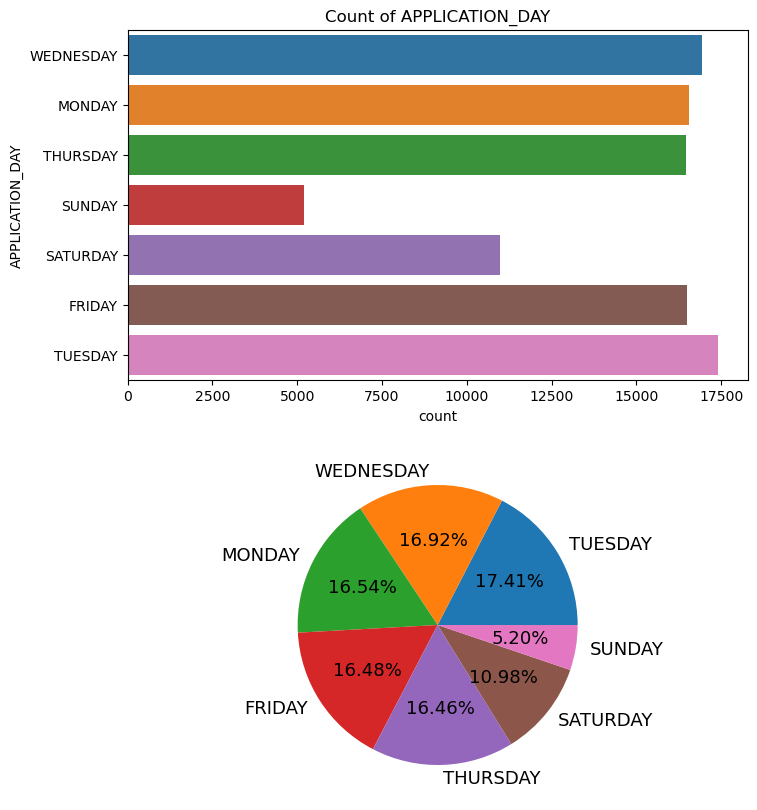

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of APPLICATION_DAY")                  
percentage = df["APPLICATION_DAY"].value_counts()         
labels = list(df["APPLICATION_DAY"].value_counts().index) 

sns.countplot(y = df["APPLICATION_DAY"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Inflow of Loan Applications are less on Weekends as against Weekdays.

## 19. Analysis of Total Documents Submitted Column

In [45]:
info_of_cat("TOTAL_DOC_SUBMITTED")

Unique values in TOTAL_DOC_SUBMITTED are: [1 0 2 3 4]
Mode of TOTAL_DOC_SUBMITTED is 1
Number of missing values in TOTAL_DOC_SUBMITTED is 0


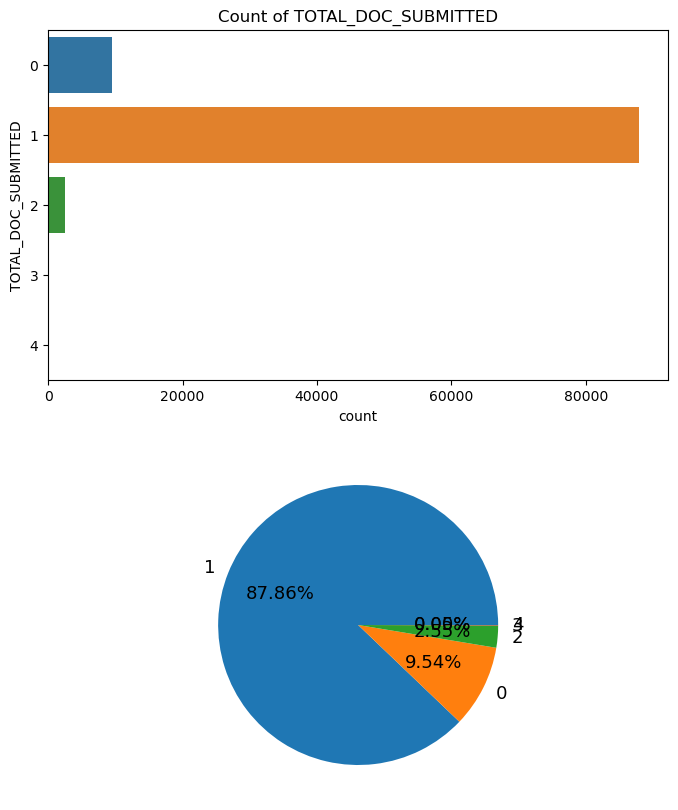

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of TOTAL_DOC_SUBMITTED")                  
percentage = df["TOTAL_DOC_SUBMITTED"].value_counts()         
labels = list(df["TOTAL_DOC_SUBMITTED"].value_counts().index) 

sns.countplot(y = df["TOTAL_DOC_SUBMITTED"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### More number of customers have submitted 1 document for Loan application. Very few have submitted 2 documents.

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

## User defined function for calculating mean, median, mode,  standard deviation, count of all null values.

In [47]:
from scipy.stats import skew

def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

## 1.  Analysis of Loan ID  Column


In [48]:
info_of_numerical("SK_ID_CURR")

The mean of the SK_ID_CURR is 158006.14086
The median of the SK_ID_CURR is 157877.0
The mode of the SK_ID_CURR is 100002
The standard deviation of the SK_ID_CURR is 33481.16699608501
Number of missing values in the SK_ID_CURR is 0


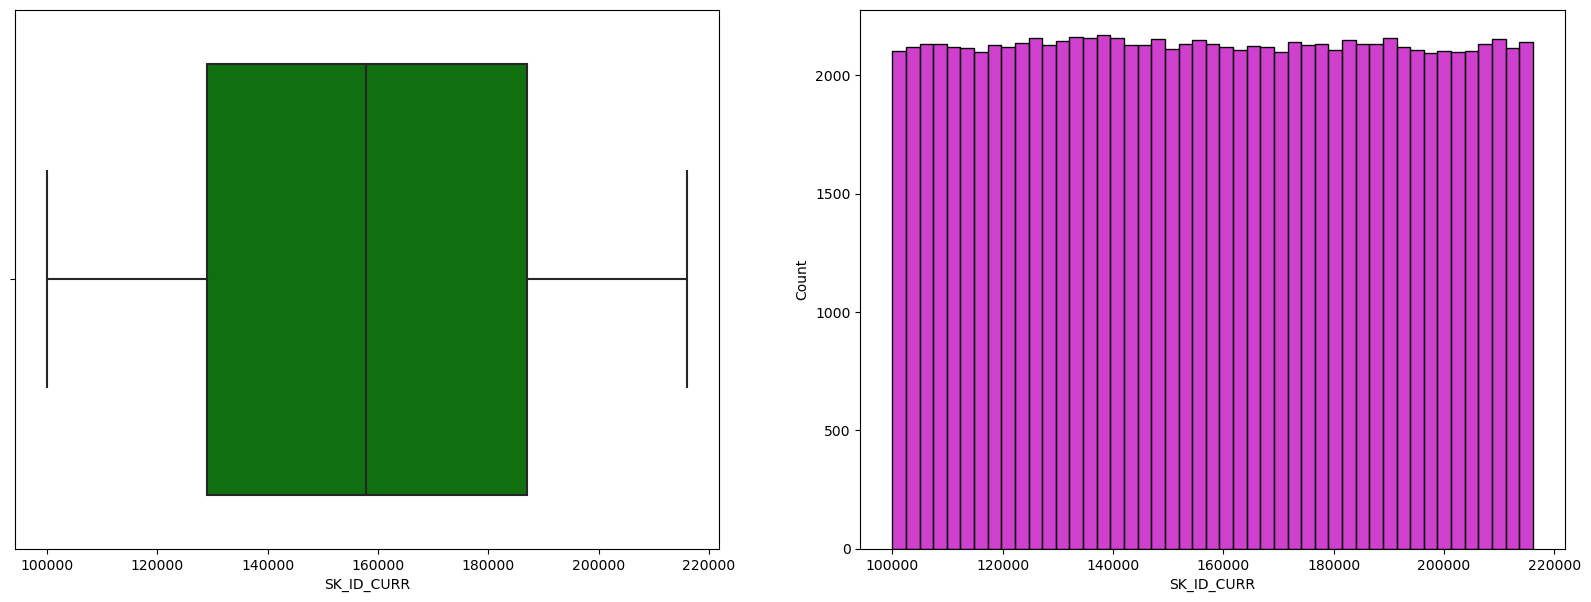

In [49]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["SK_ID_CURR"], ax =ax[1], color = "m")  
sns.boxplot(x = df["SK_ID_CURR"], ax = ax[0], color = "g")
plt.show()

###### The Loan Id is unique and has normal distribution.

## 2.  Analysis of Income Column


In [50]:
info_of_numerical("AMT_INCOME_TOTAL")

The mean of the AMT_INCOME_TOTAL is 169426.07027325002
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383500.74427718896
Number of missing values in the AMT_INCOME_TOTAL is 0


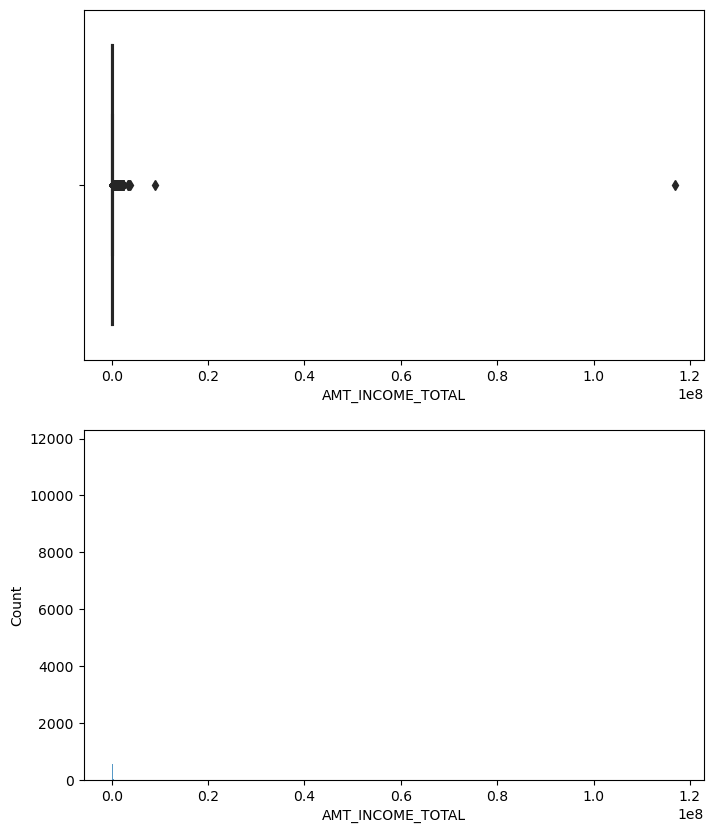

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))               
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], palette = "Set2")  
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g")
plt.show()

### Finding the extreme salary value.

In [52]:
 
df[df['AMT_INCOME_TOTAL']==df['AMT_INCOME_TOTAL'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,454500.0,...,922.0,1,1,0,1,0,Laborers,3.0,TUESDAY,1


## Outliers Analysis and Treatment: Because of Human Error in the data
An Income of 117000000 could be because of human error as the fetched row does not match with the occupation type - Labourer. 

In [53]:
mean = int(df['AMT_INCOME_TOTAL'].mean())
# accessing the data higher than 2000000
x = df[df["AMT_INCOME_TOTAL"] > 2000000].index
for index in x:
    df.loc[index, "AMT_INCOME_TOTAL"] = mean

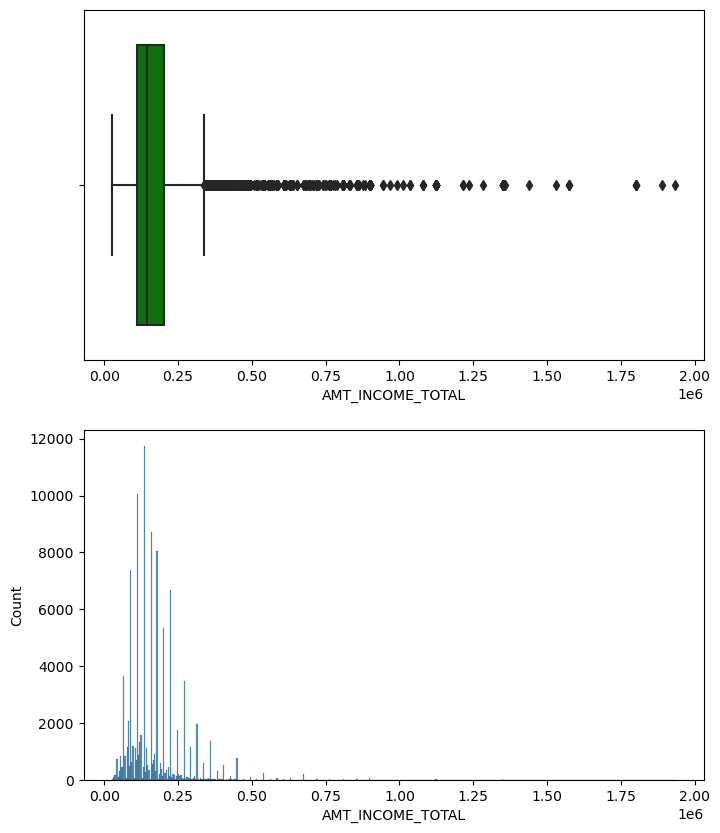

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))               
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], palette = "Set2")  
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g")
plt.show()

## Outliers Analysis
This is a right skewed data but we can infer that maximum number of customers have income between 25,000 and 2,50,000. Some of the customers have very high salary crossing 10,00,000 and all the way upto 20,00,000.

## 3.  Analysis of  Amount Credited Column


In [55]:
info_of_numerical("AMT_CREDIT")

The mean of the AMT_CREDIT is 599003.4465
The median of the AMT_CREDIT is 513040.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 402051.9591213264
Number of missing values in the AMT_CREDIT is 0


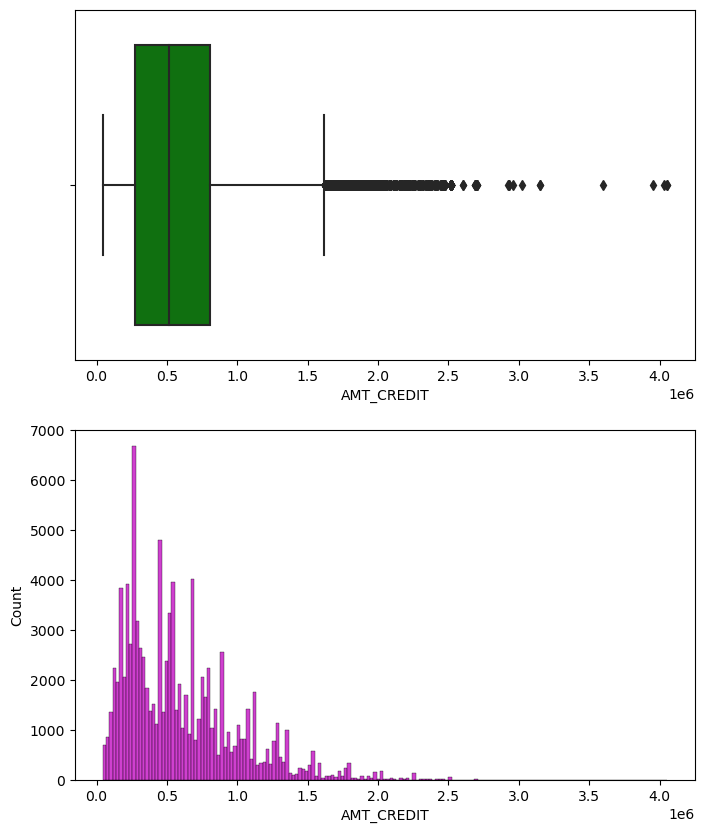

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))              
sns.histplot(x = df["AMT_CREDIT"], ax =ax[1], color = "m")  
sns.boxplot(x = df["AMT_CREDIT"], ax = ax[0], color = "g")
plt.show()

In [57]:
df[df['AMT_CREDIT']==df['AMT_CREDIT'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,4050000.0,...,1372.0,1,1,1,1,0,Managers,3.0,WEDNESDAY,1
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,4050000.0,...,201.0,1,1,1,1,1,Managers,4.0,THURSDAY,1


In [58]:
df[df['AMT_CREDIT']==df['AMT_CREDIT'].min()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
3055,103566,0,Cash loans,F,N,N,0,36000.0,45000.0,45000.0,...,365243.0,1,0,0,1,0,NaN,1.0,FRIDAY,1
3320,103883,0,Cash loans,F,N,Y,0,103500.0,45000.0,45000.0,...,1569.0,1,1,1,1,0,Sales staff,2.0,SATURDAY,1
4658,105446,0,Cash loans,F,N,N,0,112500.0,45000.0,45000.0,...,1315.0,1,1,1,1,0,Core staff,1.0,WEDNESDAY,1
5925,106941,0,Cash loans,F,N,Y,0,67500.0,45000.0,45000.0,...,1337.0,1,1,1,1,0,Cleaning staff,2.0,THURSDAY,1
6302,107356,0,Cash loans,F,N,Y,2,90000.0,45000.0,45000.0,...,7220.0,1,1,1,1,0,Private service staff,4.0,SATURDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91487,206240,1,Cash loans,M,N,Y,1,225000.0,45000.0,45000.0,...,1544.0,1,1,0,1,0,Drivers,3.0,MONDAY,1
92141,206992,0,Cash loans,M,N,Y,2,180000.0,45000.0,45000.0,...,455.0,1,1,1,1,0,NaN,4.0,MONDAY,1
96358,211865,0,Cash loans,F,N,Y,0,27000.0,45000.0,45000.0,...,365243.0,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
98931,214872,0,Cash loans,F,N,Y,0,112500.0,45000.0,45000.0,...,360.0,1,1,0,1,0,Sales staff,1.0,WEDNESDAY,1


## Outliers Analysis
This is a right skewed data with some of the customers who are Managers have borrowed upto 40,50,000. The lowest the customer has borrowed is 45,000. Not removing the outlier here as the bank could have approved such a large loan amount as their income is around 7,80,000.

## 4.  Analysis of Good Price Column


In [59]:
info_of_numerical("AMT_GOODS_PRICE")

The mean of the AMT_GOODS_PRICE is 538345.1489706662
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 369397.7246421765
Number of missing values in the AMT_GOODS_PRICE is 81


### Missing Value Treatment with Mode of the column

In [60]:
AMT_GOODS_PRICE_mode = df.AMT_GOODS_PRICE.mode()[0]
print(AMT_GOODS_PRICE_mode)
df["AMT_GOODS_PRICE"].fillna(AMT_GOODS_PRICE_mode, inplace = True)

450000.0


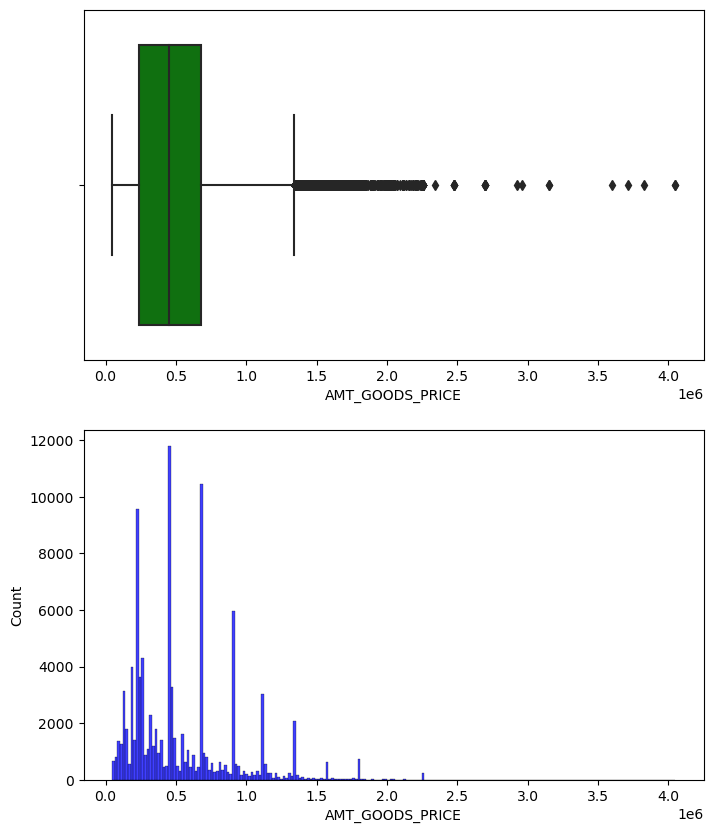

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))              
sns.histplot(x = df["AMT_GOODS_PRICE"], ax =ax[1], color = "b")  
sns.boxplot(x = df["AMT_GOODS_PRICE"], ax = ax[0], color = "g")
plt.show()

In [62]:
df[df['AMT_GOODS_PRICE']==df['AMT_GOODS_PRICE'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,4050000.0,...,1372.0,1,1,1,1,0,Managers,3.0,WEDNESDAY,1
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,4050000.0,...,201.0,1,1,1,1,1,Managers,4.0,THURSDAY,1


## Outliers Analysis
This is a right skewed data. Some of the customers have borrowed loan upto 40,50,000 for the same goods price. Hence, not removing the outlier.

## 5.  Analysis of Days Employed Column


In [63]:
info_of_numerical("DAYS_EMPLOYED")

The mean of the DAYS_EMPLOYED is 67209.10184
The median of the DAYS_EMPLOYED is 2203.0
The mode of the DAYS_EMPLOYED is 365243.0
The standard deviation of the DAYS_EMPLOYED is 139013.1548665735
Number of missing values in the DAYS_EMPLOYED is 0


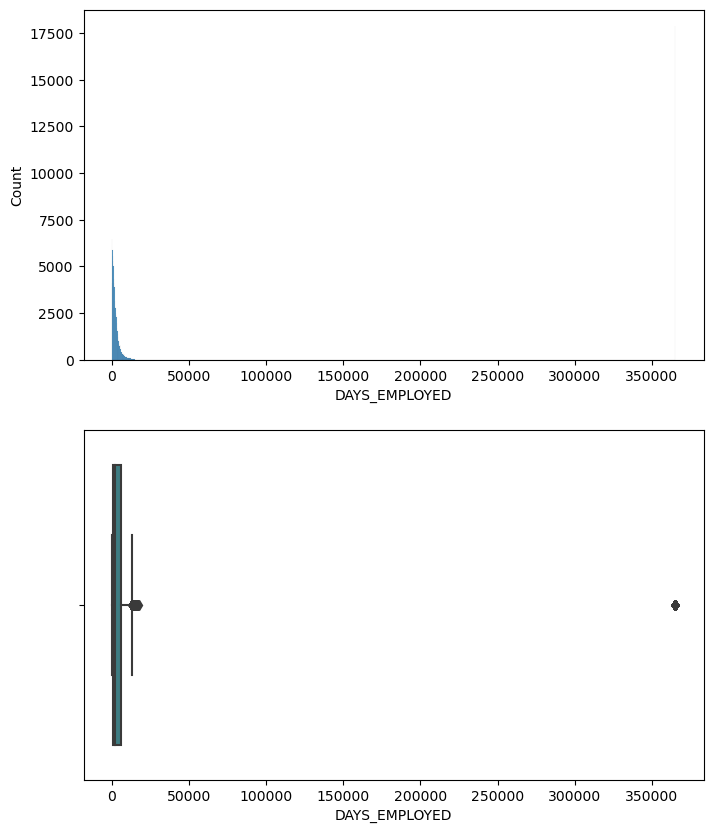

In [64]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))              
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[0], palette = "magma")  
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[1], palette = "crest")
plt.show()

In [65]:
df[df['DAYS_EMPLOYED']==df['DAYS_EMPLOYED'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,913500.0,...,365243.0,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,135000.0,...,365243.0,1,0,0,1,0,NaN,2.0,FRIDAY,1
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,225000.0,...,365243.0,1,0,0,1,0,NaN,2.0,FRIDAY,1
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,225000.0,...,365243.0,1,0,0,1,0,NaN,2.0,FRIDAY,1
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,675000.0,...,365243.0,1,0,0,1,0,NaN,1.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99950,216037,0,Cash loans,F,N,N,0,103500.000,540000.0,540000.0,...,365243.0,1,0,0,1,0,NaN,1.0,TUESDAY,1
99963,216053,0,Cash loans,F,Y,Y,0,67500.000,544491.0,454500.0,...,365243.0,1,0,0,1,0,NaN,2.0,FRIDAY,1
99976,216067,0,Cash loans,M,Y,Y,0,180000.000,1002870.0,922500.0,...,365243.0,1,0,0,1,0,NaN,2.0,MONDAY,1
99981,216072,0,Cash loans,F,N,Y,0,35100.000,294322.5,243000.0,...,365243.0,1,0,0,1,0,NaN,2.0,SUNDAY,1


## Outliers Analysis and Treatment:

Number of days employed in outlier is 365243 Days before Loan application date which is equal to 1000 Years. Hence, this could be a human error and replacing the value with mean of the column.

Some of the outlier are more than 10000 Days which could also be a human error in the Dataset

In [66]:
mean = int(df['DAYS_EMPLOYED'].mean())
# accessing the data higher than 8000
x = df[df["DAYS_EMPLOYED"] > 8000].index
for index in x:
    df.loc[index, "DAYS_EMPLOYED"] = mean

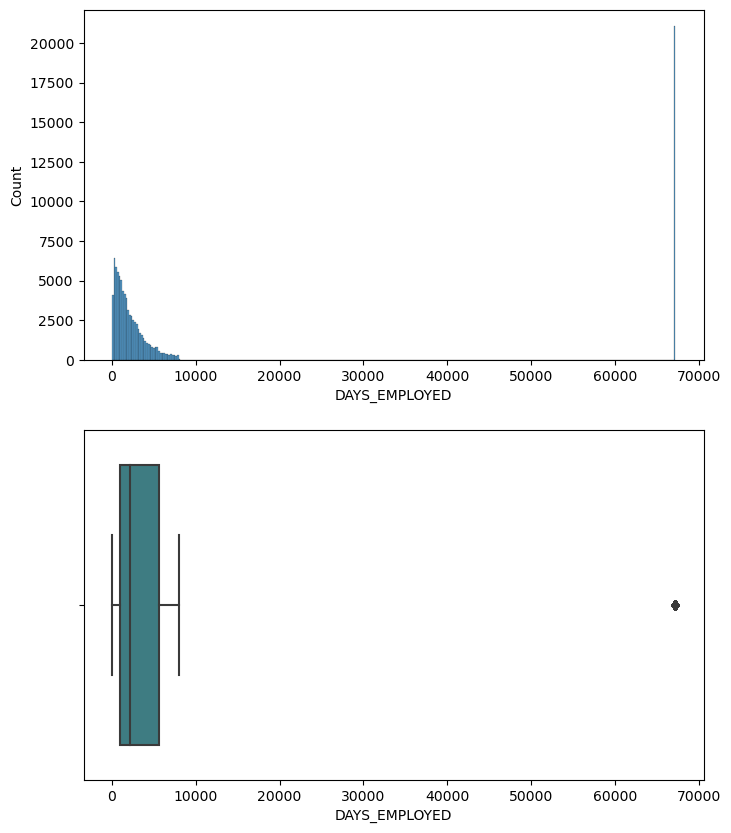

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))              
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[0], palette = "magma")  
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[1], palette = "crest")
plt.show()

## Outliers Analysis
This is a right skewed data. This column has lot of human error as the number of days employed before Loan application has extreme values.

# Level-2 Bi-Variate Analysis

In [68]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


## Q1. Relationship of Target with Income Type


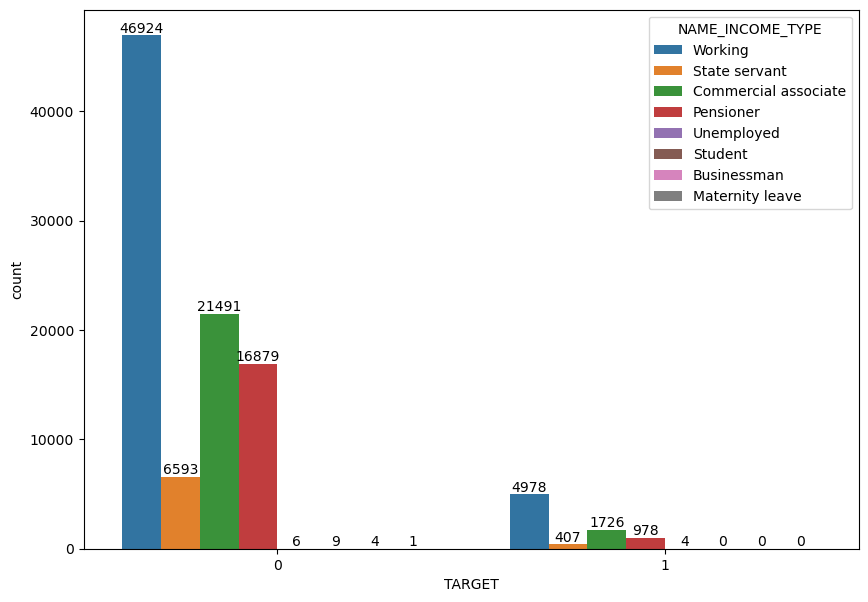

In [69]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "TARGET", hue = "NAME_INCOME_TYPE", data = df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

### ***Interpretation: Value '1' indicates that these customers have missed payment due dates atleast once and could be a defaulter. 
Amongst these customers, State Servants are the least in number.

### Amongst the ones who have never missed their payment dates, Working income type group is the highest along with Commercial associates, Pensioners, State Servants and they have the least chances of defaulting.

## Q2. Relationship of Family status with Education


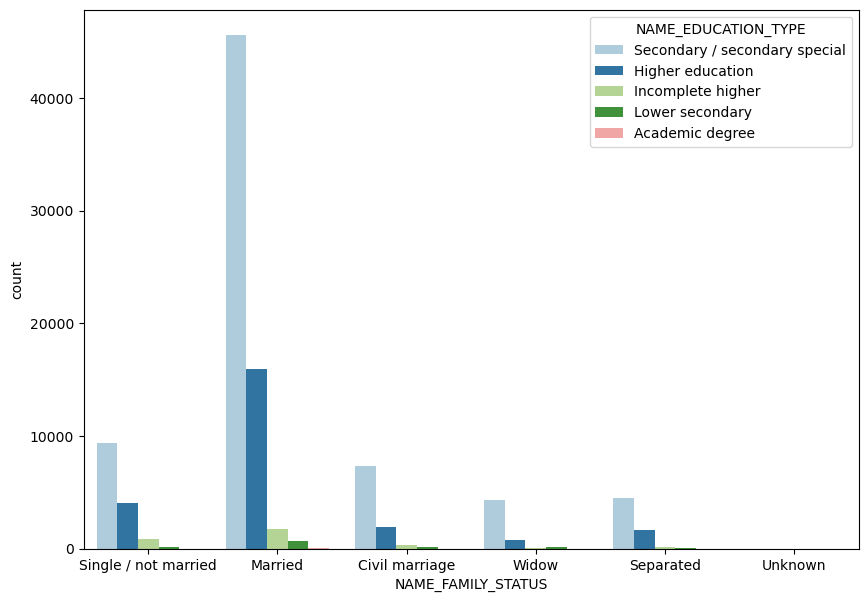

In [70]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "NAME_EDUCATION_TYPE", data = df, palette = 'Paired')

plt.show()

### ***Interpretation: Most of the married customers have their education background as Secondary Special and Higher Education. They are least likely to be defaulters as they are educated in good number.

## Q3. Relationship of Gender with Documents Submitted


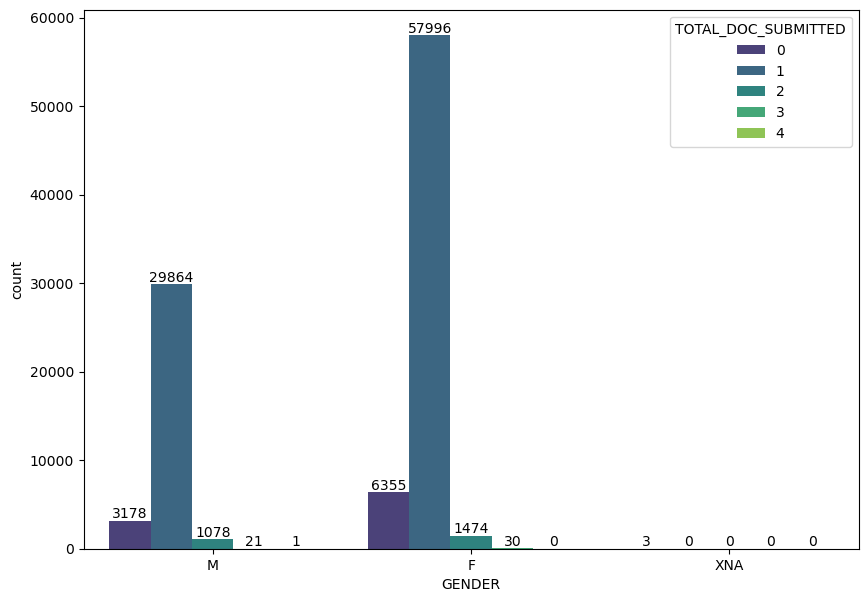

In [71]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "GENDER", hue = "TOTAL_DOC_SUBMITTED", data = df, palette = 'viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

### ***Interpretation: Females have submitted more number of documents compared to males. 

## Q4. Relationship of Gender with Mobile Reachable


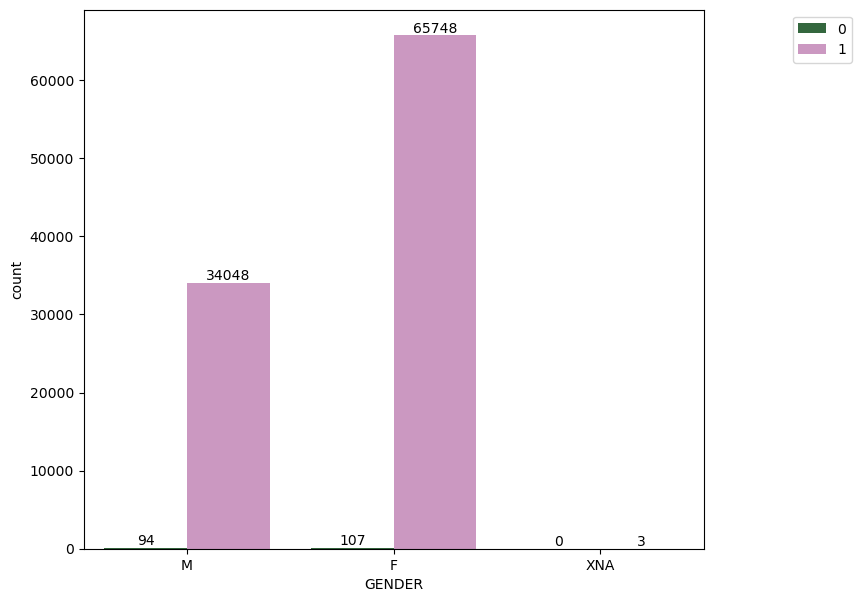

In [72]:
fig, ax = plt.subplots(figsize = (8, 7))
sns.countplot(x = "GENDER", hue = "MOBILE_REACHABLE", data = df, palette = 'cubehelix')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.legend(bbox_to_anchor =(1.25, 1))
plt.show()

### ***Interpretation: Females are easily reachable via Mobile phone compared to Males.

## Q5. Relationship of Gender with Family Status


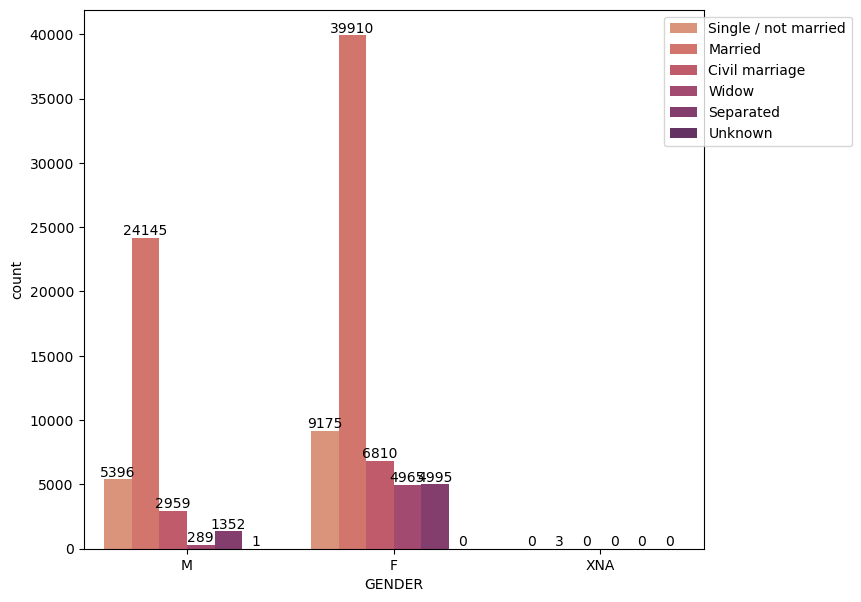

In [73]:
fig, ax = plt.subplots(figsize = (8, 7))
sns.countplot(x = "GENDER", hue = "NAME_FAMILY_STATUS", data = df, palette = 'flare')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.legend(bbox_to_anchor =(1.25, 1))
plt.show()

### ***Interpretation: There are more number of Females who are Married and they could be less likely to default as they are educated from the above analysis of Gender vs education column. 

# CAT - NUM Analysis
Bi-variate

## Q6. Relationship of Gender with Income

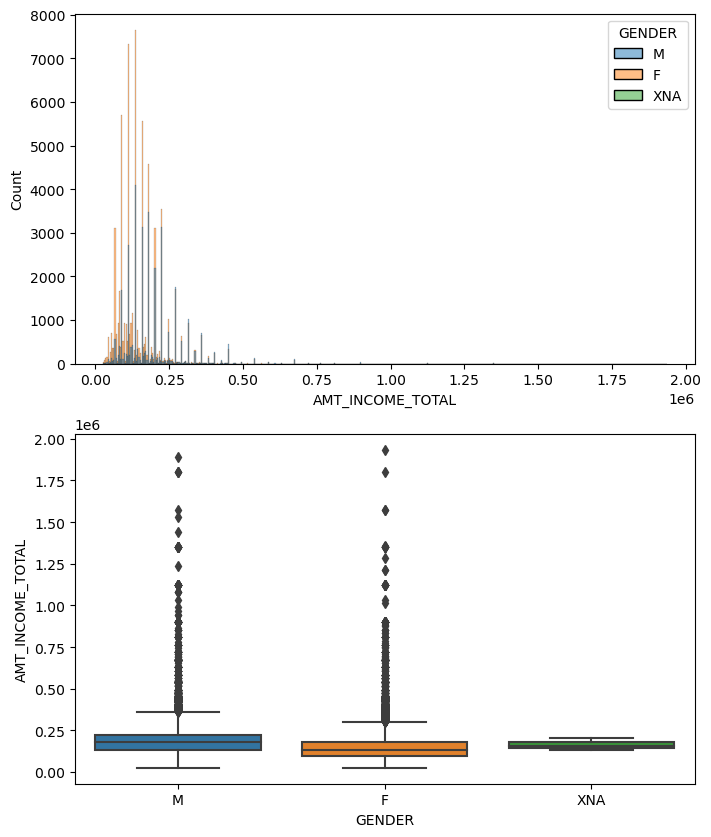

In [74]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
sns.histplot(x = df["AMT_INCOME_TOTAL"], hue = df["GENDER"], ax = ax[0])
sns.boxplot(y = df["AMT_INCOME_TOTAL"], x = df["GENDER"], ax = ax[1])
plt.show()

## ***Interpretation:  From the Histogram, Females have higher income compared to males.

## Q7. Relationship of Family Status with Income

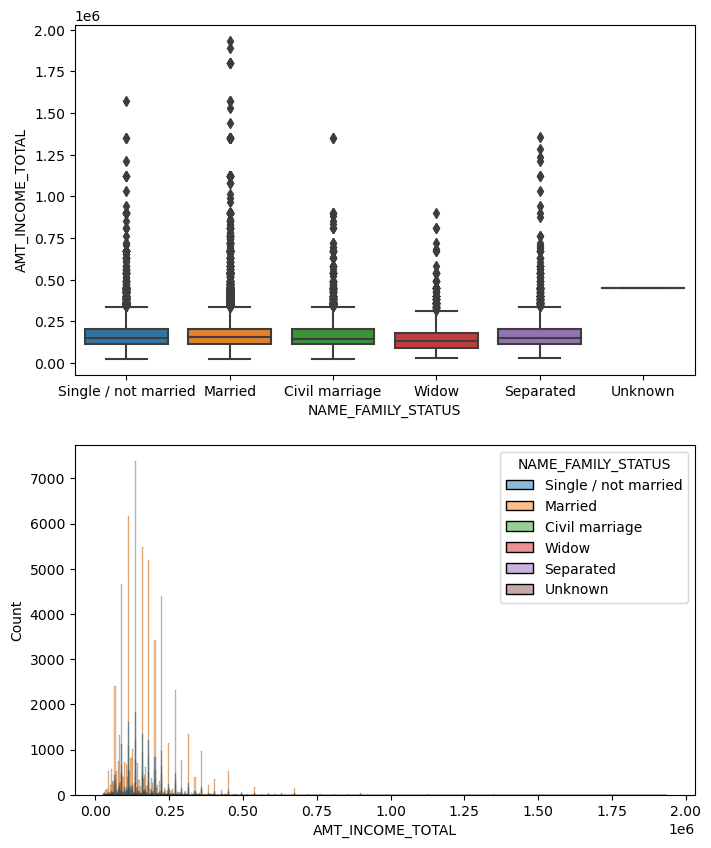

In [75]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
sns.histplot(x = df["AMT_INCOME_TOTAL"], hue = df["NAME_FAMILY_STATUS"], ax = ax[1])
sns.boxplot(y = df["AMT_INCOME_TOTAL"], x = df["NAME_FAMILY_STATUS"], ax = ax[0])
plt.show()

## ***Interpretation:  Married Family status has more income compared to other family status. They are fincanically stable and less likely to default on payments. 

## Widows have the lowest income and are more likey to default.

# Level-3 MultiVariate Analysis

## Q1. Relationship of Gender with Income and Education

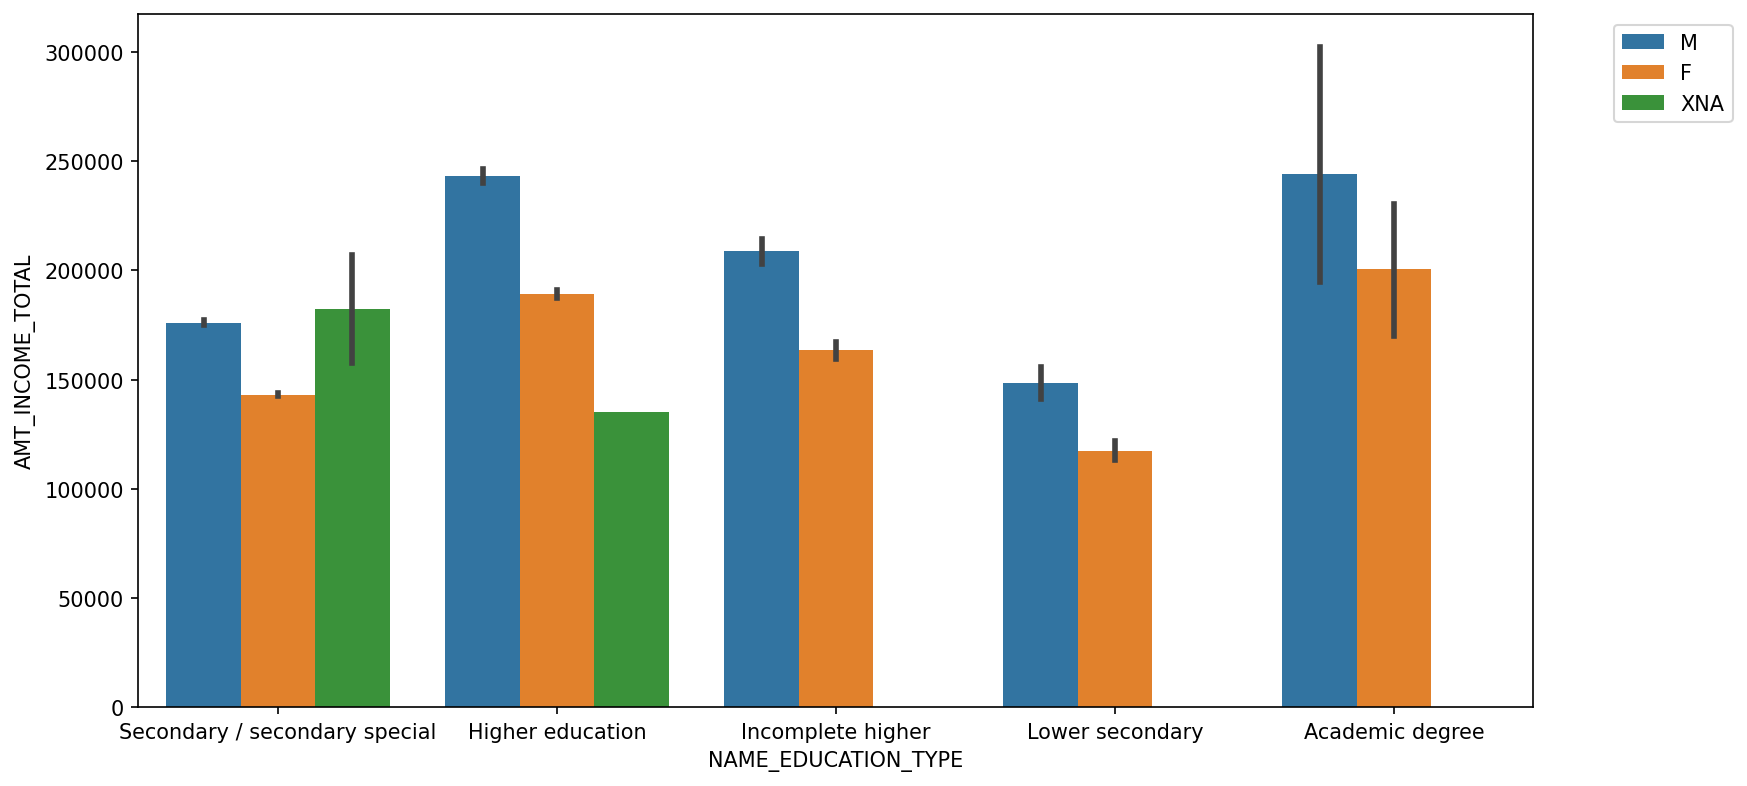

In [76]:
plt.figure(figsize = (12, 6), dpi = 150 )
sns.barplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', data = df, hue = 'GENDER')
plt.legend(bbox_to_anchor =(1.05, 1));

###### Males with Higher education and Academic degree tend to have higher salary. Females are also almost closer to what males earn considering they have good education.

## Q2. Relationship of Family status with House and Children count

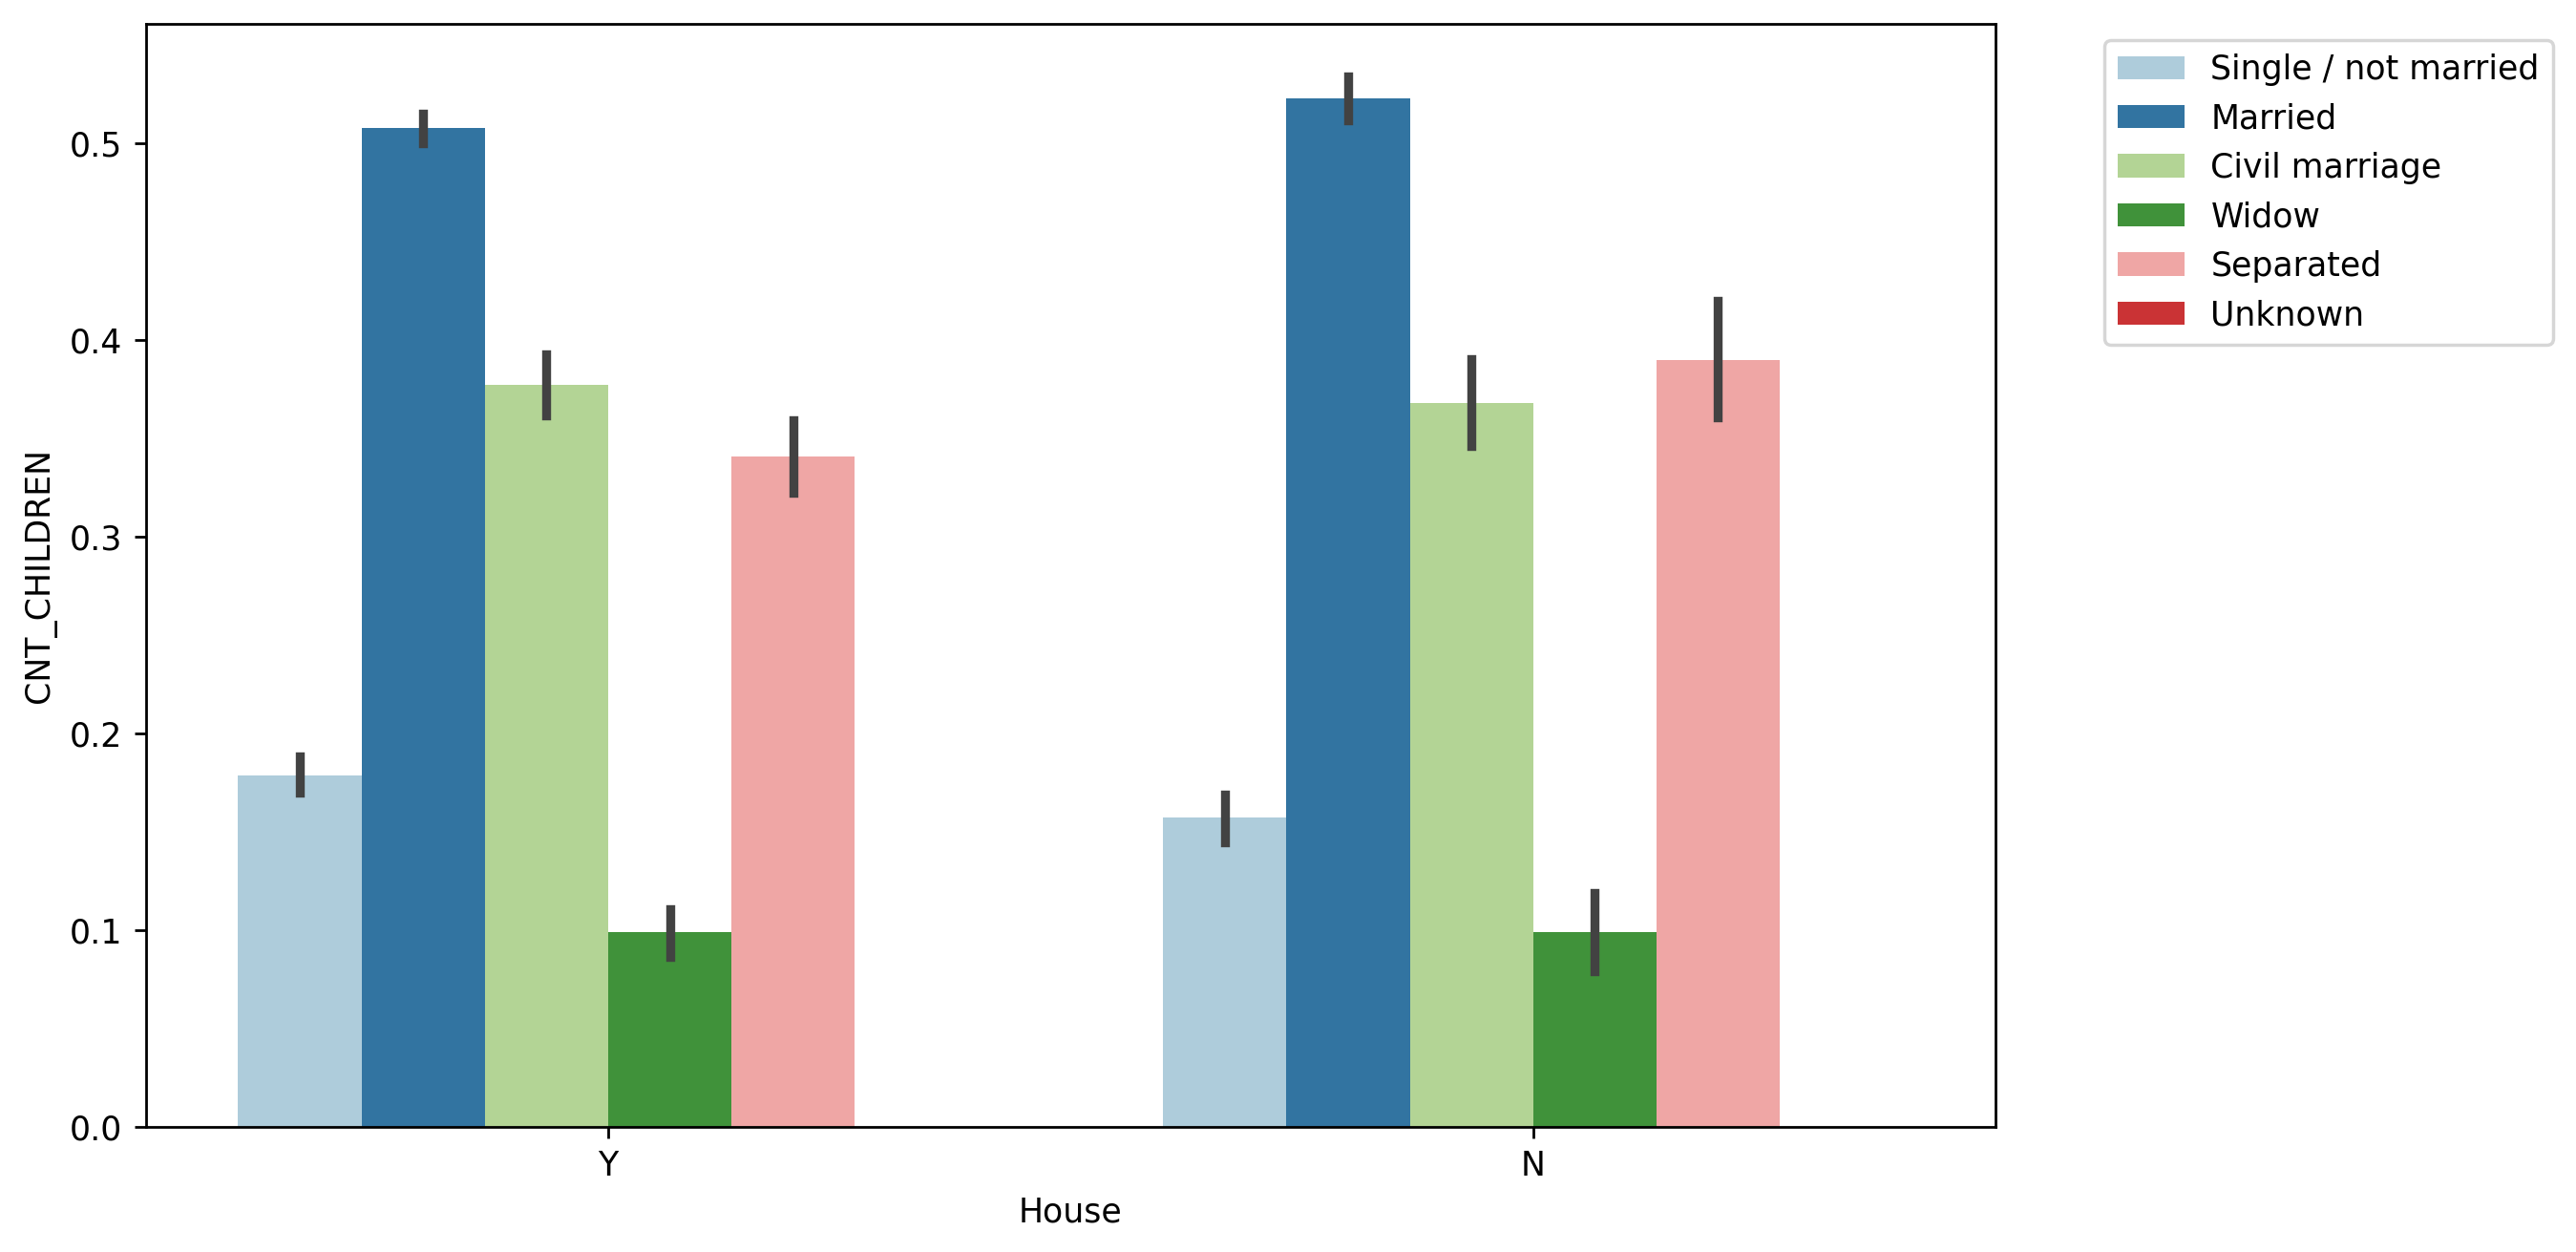

In [77]:
plt.figure(figsize = (10, 6), dpi = 250 )
sns.barplot(x = 'House', y = 'CNT_CHILDREN', data = df, hue = 'NAME_FAMILY_STATUS', palette  = 'Paired')
plt.legend(bbox_to_anchor =(1.05, 1));

###### Married couples have more number of children whether or not they own a house or not. They would require more loans in future for their childrens higher studies. Hence, they are less likely to default and do not wish to reduce their cibil scores. 

###### Married couples have a higher stable income from the Bivariate analysis and it is safe to provide loans.

###### Widows have the least number of children but with those widows who own a house, bank can have house as mortgage if they are likely to default on payments.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Conclusion :

## From Univariate, Bivariate and Multivariate Analysis:
### Key Factors for a customer to not default on payments are:
#### -Stable Income
#### -Good Education
#### -Occupation Type
#### -Marital Status
#### -Mobile Reachability
### Customers with lower probability of defaulting on payments are - 
#### Married couples who have minimum education of Secondary Special.
#### Female customers who are not single but married as they have higher overall house income.
#### Income type with Working, State Servants and Commercial associates and Pensioners are stable and are less likely to default on payments.
#### Females have submitted more documents compared to males and are easily reachable over calls. Hence, it is relatively safer with Female customers than Male customers. 

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------